## 使用 Keras 做 IMDB 影评分类 - FC

### 导入数据

In [2]:
from keras.datasets import imdb

# num_words = 10000 意思是只保留出现次数最多的前 10000 个词
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

其中每条影评存储的是各个单词在一个词表中的下标。

In [3]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


可以下载到该词表

In [4]:
word_index = imdb.get_word_index()
word_index['hello']

4822

In [7]:
reverse_word_index = {value: key for (key, value) in word_index.items()}
reverse_word_index[4822]

'hello'

将影评恢复为文本后，可以看出每条影评的原文。需要注意的是每个词的索引向后移动了 3 位，因为 0, 1, 2 留给了 "padding", "start of sequence", "unknown"。但这三个特殊字符并没有出现在单词表中，所以在解码的时候需要将索引减去 3。

In [5]:
review_text = ' '.join([reverse_word_index.get(index - 3, '?') for index in train_data[0]])
review_text

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### 预处理数据

把评论转为 one-hot 编码的向量，以便交给神经网络来处理。

In [26]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [28]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 训练网络

In [34]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='nadam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [35]:
history = model.fit(X_train, y_train,
                    epochs=6, batch_size=32,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/6
20000/20000 [==============================] - 5s 254us/step - loss: 0.3298 - acc: 0.8605 - val_loss: 0.2728 - val_acc: 0.8914
Epoch 2/6
20000/20000 [==============================] - 4s 192us/step - loss: 0.1652 - acc: 0.9372 - val_loss: 0.2979 - val_acc: 0.8854
Epoch 3/6
20000/20000 [==============================] - 4s 209us/step - loss: 0.0894 - acc: 0.9674 - val_loss: 0.3834 - val_acc: 0.8768
Epoch 4/6
20000/20000 [==============================] - 4s 209us/step - loss: 0.0357 - acc: 0.9882 - val_loss: 0.5003 - val_acc: 0.8654
Epoch 5/6
20000/20000 [==============================] - 4s 212us/step - loss: 0.0233 - acc: 0.9926 - val_loss: 0.7139 - val_acc: 0.8694
Epoch 6/6
20000/20000 [==============================] - 4s 210us/step - loss: 0.0150 - acc: 0.9946 - val_loss: 0.8024 - val_acc: 0.8636


### 观察 history

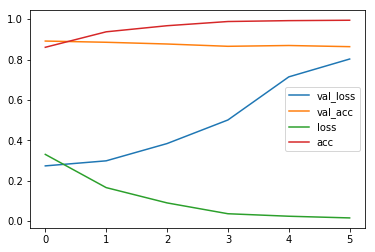

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

pd.DataFrame(history.history).plot();

从第 1 个 epoch 起，验证集上的 loss 就一直上升，可见模型过拟合了。

### 使用 Dropout 对抗过拟合

In [40]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='nadam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=6, batch_size=32,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/6
20000/20000 [==============================] - 5s 239us/step - loss: 0.3734 - acc: 0.8448 - val_loss: 0.2810 - val_acc: 0.8882
Epoch 2/6
20000/20000 [==============================] - 4s 213us/step - loss: 0.2129 - acc: 0.9221 - val_loss: 0.3121 - val_acc: 0.8776
Epoch 3/6
20000/20000 [==============================] - 4s 223us/step - loss: 0.1482 - acc: 0.9488 - val_loss: 0.3981 - val_acc: 0.8816
Epoch 4/6
20000/20000 [==============================] - 4s 215us/step - loss: 0.0992 - acc: 0.9655 - val_loss: 0.5022 - val_acc: 0.8726
Epoch 5/6
20000/20000 [==============================] - 4s 210us/step - loss: 0.0602 - acc: 0.9816 - val_loss: 0.5775 - val_acc: 0.8708
Epoch 6/6
20000/20000 [==============================] - 4s 217us/step - loss: 0.0402 - acc: 0.9890 - val_loss: 0.7225 - val_acc: 0.8700


### 在测试集上评估评估模型的效果

In [41]:
model.evaluate(X_test, y_test)

25000/25000 [==============================] - 3s 101us/step


[0.7677455904477835, 0.85732]